In [2]:
# Import necessary packages
# from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
# import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
pic_size = 48
b_path = "./data/images/"

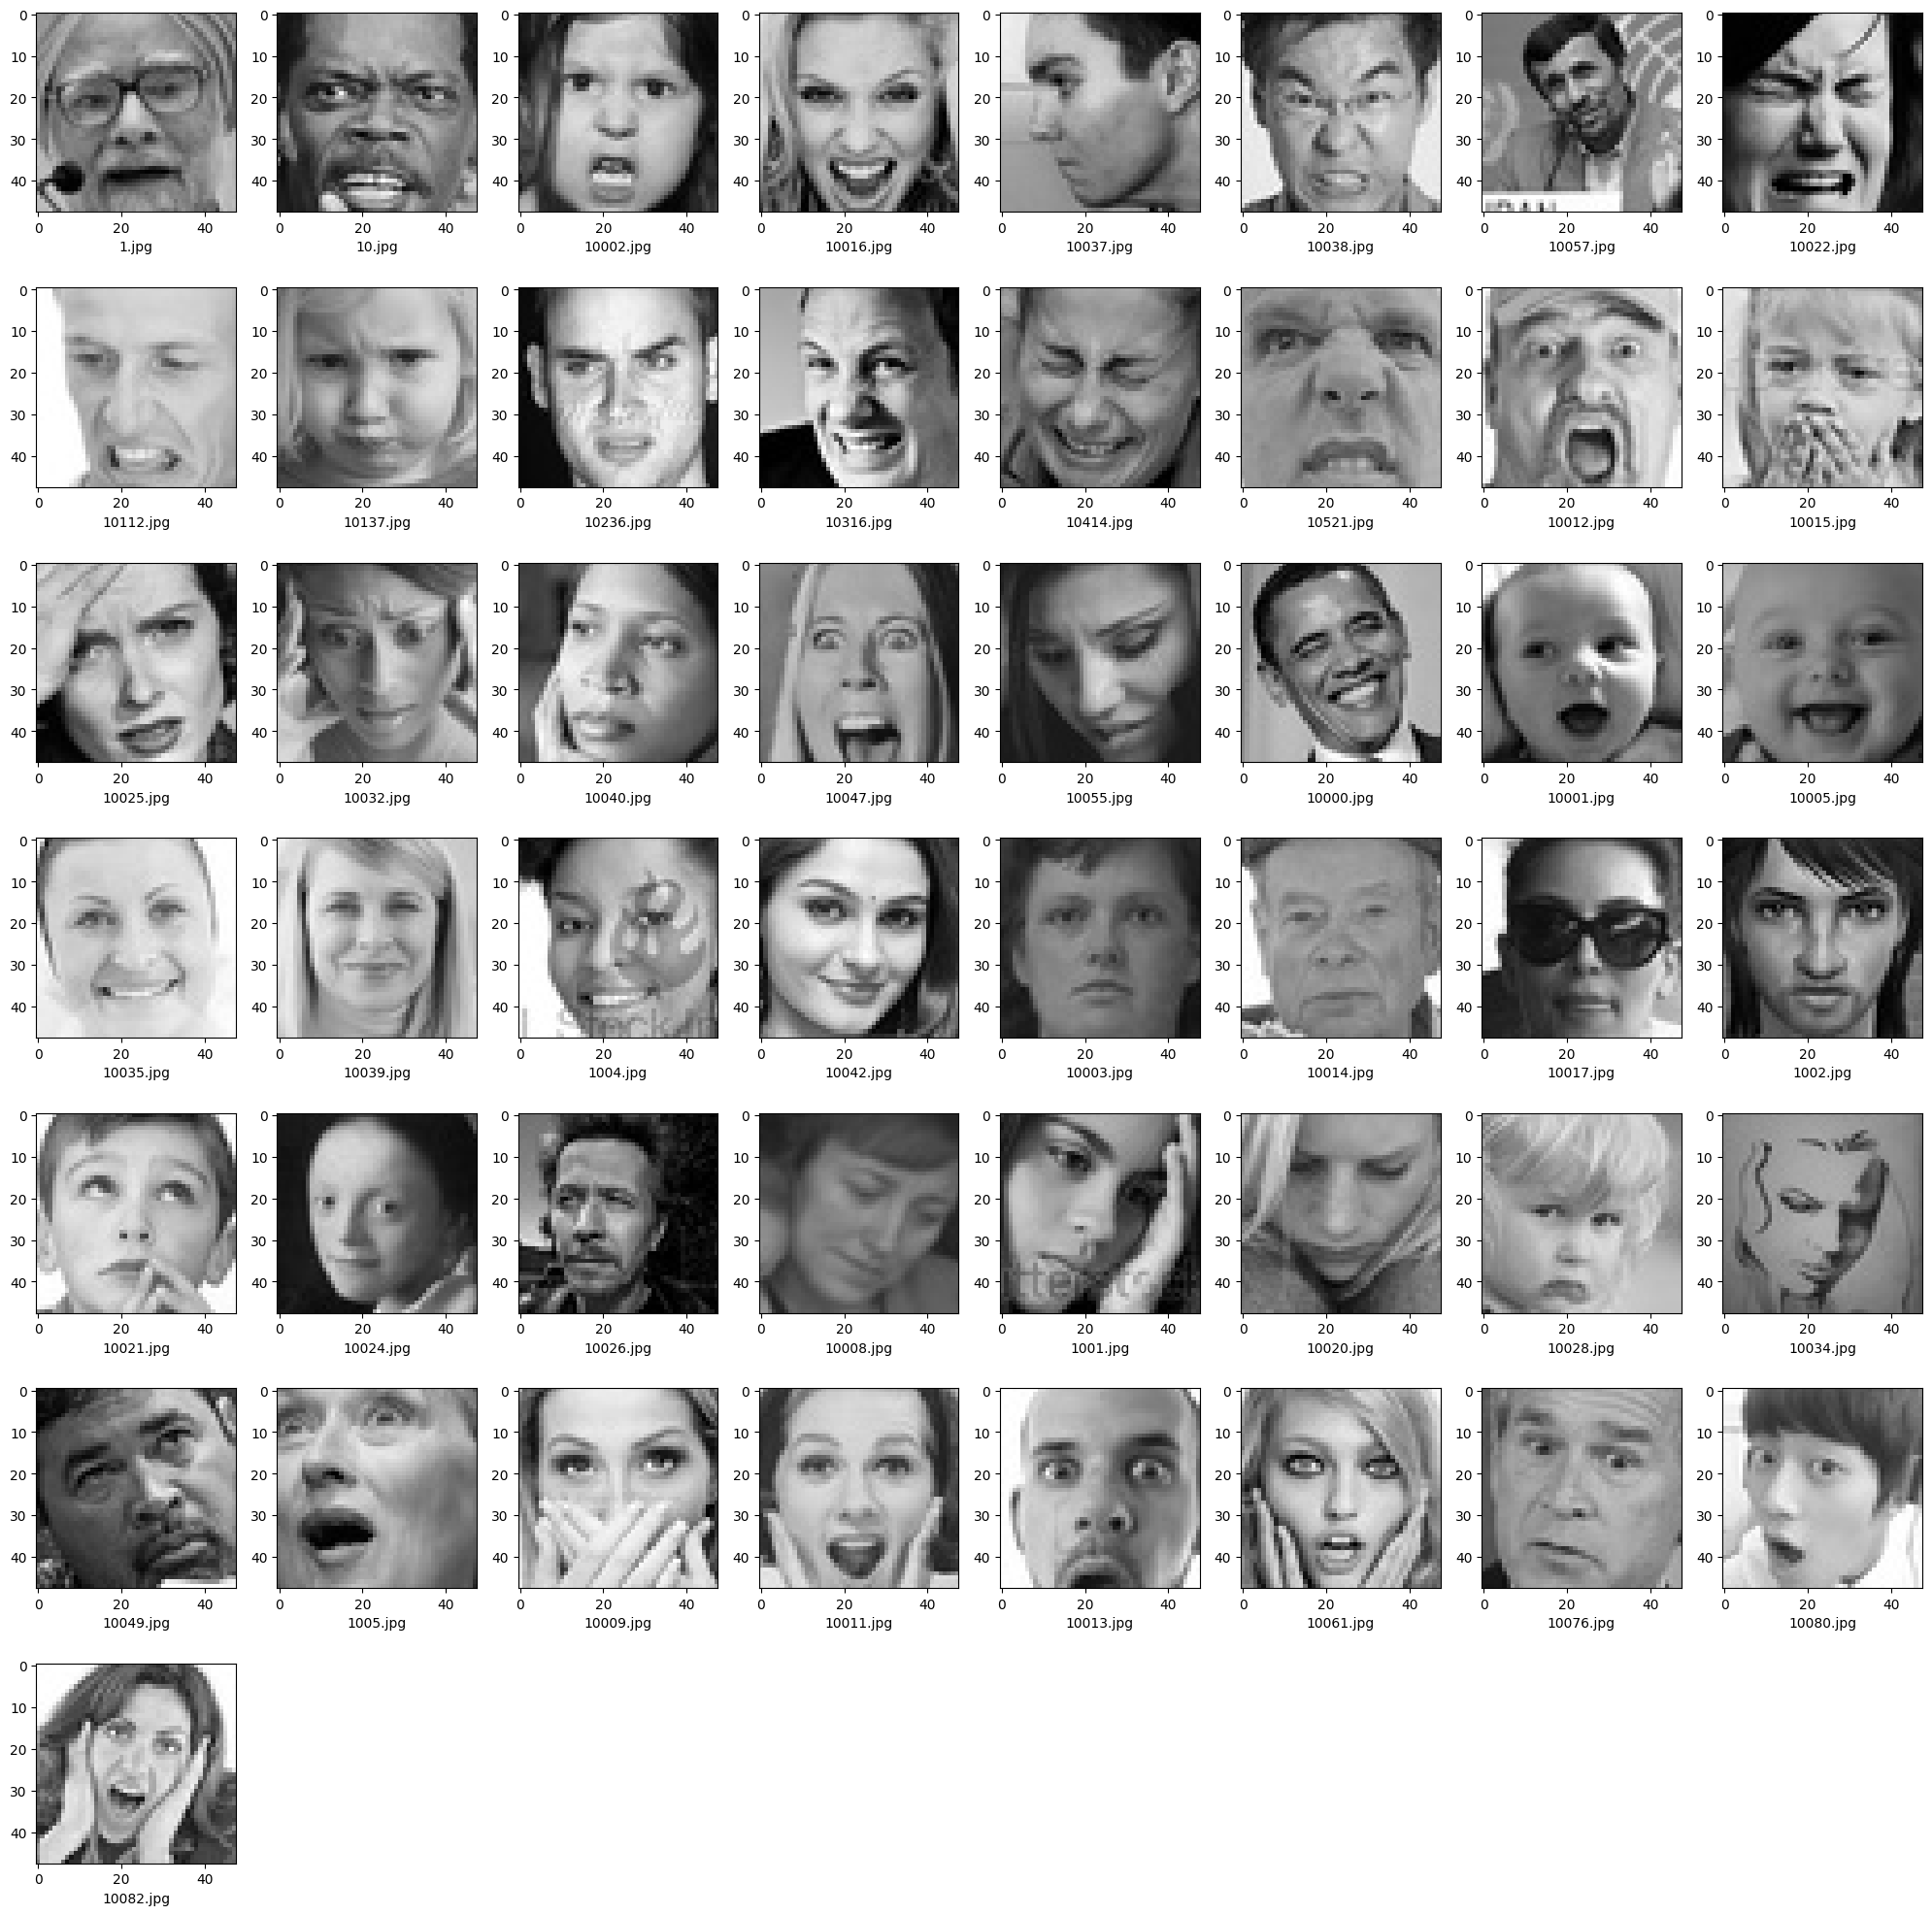

In [4]:
plt.figure(0,figsize=(20,20))
cpt=0
for expression in os.listdir(b_path + "train/"):
    for i in range(1,8):
        cpt += 1
        plt.subplot(7,8,cpt)
        img=load_img(b_path+"train/"+expression+"/"+os.listdir(b_path+"train/"+expression)[i],target_size=(pic_size,pic_size))
        plt.imshow(img,cmap='gray')
        plt.xlabel(os.listdir(b_path+"train/"+expression)[i])
plt.tight_layout()
plt.show()

In [5]:
for expression in os.listdir(b_path + "train"):
    print(str(len(os.listdir(b_path + "train/" + expression)))+" "+expression+" images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


In [7]:
train_dat = IDG()
val_dat = IDG()
batch_size = 128
epochs = 60
train_gen = train_dat.flow_from_directory(b_path+"train",target_size=(pic_size,pic_size)
                                          ,color_mode="grayscale",batch_size=batch_size,
                                          class_mode="categorical",shuffle=True)
val_gen = val_dat.flow_from_directory(b_path+"validation",target_size=(pic_size,pic_size),
                                       color_mode="grayscale",batch_size=batch_size,
                                       class_mode="categorical",shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [8]:
n_classes = 7
#layer 1
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 2
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 3
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 4
model.add(Conv2D(512,(3,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#FC Layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.25))
#FC Layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.25))
#FC Layer 3
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.25))

model.add(Dense(n_classes,activation='softmax'))
opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [9]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor = "val_acc",verbose=1,
                             save_best_only=True,mode = "max")
callbacks_list = [checkpoint]
history = model.fit_generator(generator=train_gen,steps_per_epoch=train_gen.n//train_gen.batch_size
                              ,epochs=epochs,validation_data = val_gen,validation_steps=val_gen.n//val_gen.batch_size,
                             callbacks = callbacks_list)

C:\Users\mathe\AppData\Local\Temp\ipykernel_1432\3863430605.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_gen,steps_per_epoch=train_gen.n//train_gen.batch_size


Epoch 1/60
225/225 [==============================] - 99s 391ms/step - loss: 2.3440 - accuracy: 0.1449 - val_loss: 2.0507 - val_accuracy: 0.1909
Epoch 2/60
225/225 [==============================] - 92s 407ms/step - loss: 2.3113 - accuracy: 0.1524 - val_loss: 2.0108 - val_accuracy: 0.2284
Epoch 3/60
225/225 [==============================] - 83s 368ms/step - loss: 2.2938 - accuracy: 0.1577 - val_loss: 2.0011 - val_accuracy: 0.2330
Epoch 4/60
225/225 [==============================] - 76s 339ms/step - loss: 2.2809 - accuracy: 0.1555 - val_loss: 1.9828 - val_accuracy: 0.2453
Epoch 5/60
225/225 [==============================] - 78s 345ms/step - loss: 2.2592 - accuracy: 0.1635 - val_loss: 1.9834 - val_accuracy: 0.2496
Epoch 6/60
225/225 [==============================] - 84s 372ms/step - loss: 2.2411 - accuracy: 0.1672 - val_loss: 1.9459 - val_accuracy: 0.2605
Epoch 7/60
225/225 [==============================] - 70s 309ms/step - loss: 2.2298 - accuracy: 0.1663 - val_loss: 1.9347 - val_ac

Epoch 28/60
225/225 [==============================] - 93s 412ms/step - loss: 2.0855 - accuracy: 0.2002 - val_loss: 1.8353 - val_accuracy: 0.3114
Epoch 29/60
225/225 [==============================] - 93s 413ms/step - loss: 2.0927 - accuracy: 0.2018 - val_loss: 1.8267 - val_accuracy: 0.3119
Epoch 30/60
225/225 [==============================] - 94s 416ms/step - loss: 2.0891 - accuracy: 0.1966 - val_loss: 1.8244 - val_accuracy: 0.3142
Epoch 31/60
225/225 [==============================] - 92s 407ms/step - loss: 2.0744 - accuracy: 0.2044 - val_loss: 1.8194 - val_accuracy: 0.3158
Epoch 32/60
225/225 [==============================] - 80s 357ms/step - loss: 2.0789 - accuracy: 0.2033 - val_loss: 1.8162 - val_accuracy: 0.3135
Epoch 33/60
225/225 [==============================] - 93s 411ms/step - loss: 2.0750 - accuracy: 0.2010 - val_loss: 1.8206 - val_accuracy: 0.3155
Epoch 34/60
225/225 [==============================] - 63s 278ms/step - loss: 2.0628 - accuracy: 0.2058 - val_loss: 1.8177 -

Epoch 55/60
225/225 [==============================] - 94s 415ms/step - loss: 1.9980 - accuracy: 0.2277 - val_loss: 1.7900 - val_accuracy: 0.3368
Epoch 56/60
225/225 [==============================] - 85s 377ms/step - loss: 1.9944 - accuracy: 0.2304 - val_loss: 1.7890 - val_accuracy: 0.3379
Epoch 57/60
225/225 [==============================] - 93s 414ms/step - loss: 1.9897 - accuracy: 0.2321 - val_loss: 1.7860 - val_accuracy: 0.3369
Epoch 58/60
225/225 [==============================] - 93s 413ms/step - loss: 1.9923 - accuracy: 0.2298 - val_loss: 1.7850 - val_accuracy: 0.3379
Epoch 59/60
225/225 [==============================] - 93s 413ms/step - loss: 1.9773 - accuracy: 0.2358 - val_loss: 1.7891 - val_accuracy: 0.3395
Epoch 60/60
225/225 [==============================] - 93s 413ms/step - loss: 1.9823 - accuracy: 0.2365 - val_loss: 1.7848 - val_accuracy: 0.3396


In [10]:

model.save("model_SGD_L3_BS128_E60.h5")


In [11]:
accuracy = history.history['accuracy']
max_accuracy = max(accuracy)

val_accuracy = history.history['val_accuracy']
max_val_accuracy = max(val_accuracy)

loss = history.history['loss']
min_loss = min(loss)


val_loss = history.history['val_loss']
min_val_loss = min(val_loss)

print("max_accuracy: " + str(max_accuracy).replace(".", ",") + "\n"
     + "max_val_accuracy: " + str(max_val_accuracy).replace(".", ",") + "\n"
     + "min_loss: " + str(min_loss).replace(".", ",") + "\n"
     + "min_val_loss: " + str(min_val_loss).replace(".", ","))

max_accuracy: 0,2364688217639923
max_val_accuracy: 0,33963069319725037
min_loss: 1,9773350954055786
min_val_loss: 1,7848156690597534


NameError: name 'history' is not defined

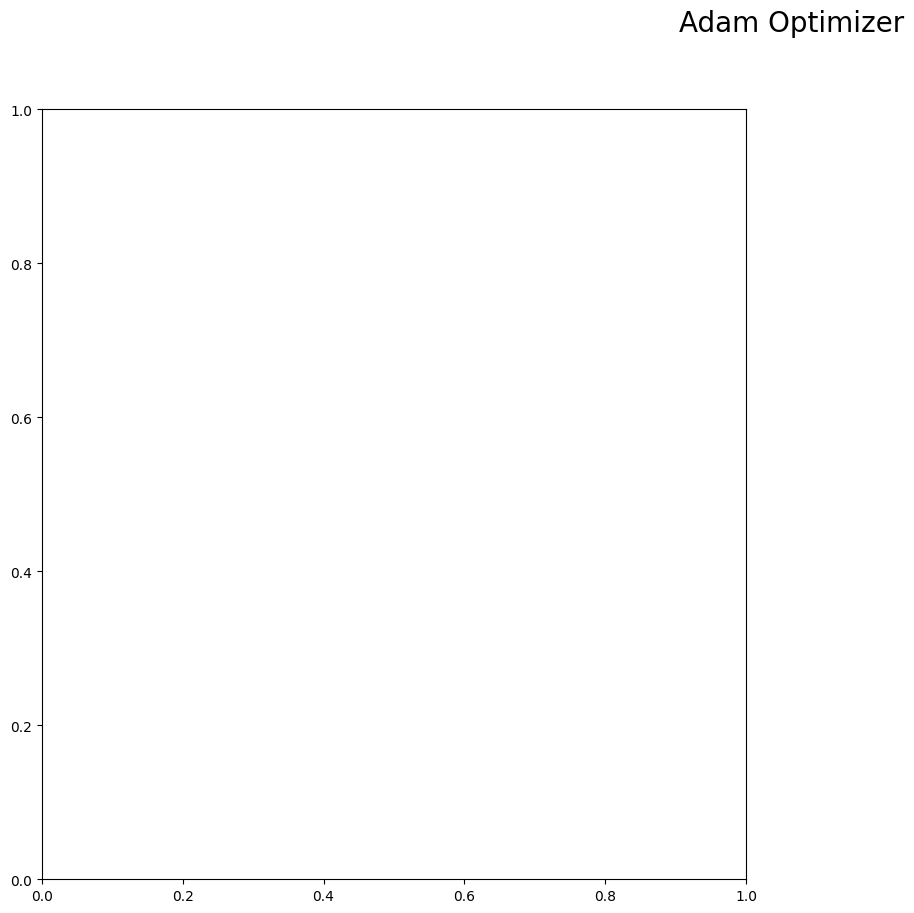

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Adam Optimizer',fontsize=20)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel("Accuracy",fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()